In [28]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

df = pd.read_csv("data\\housing.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253B2C87220>,
      dtype=object)

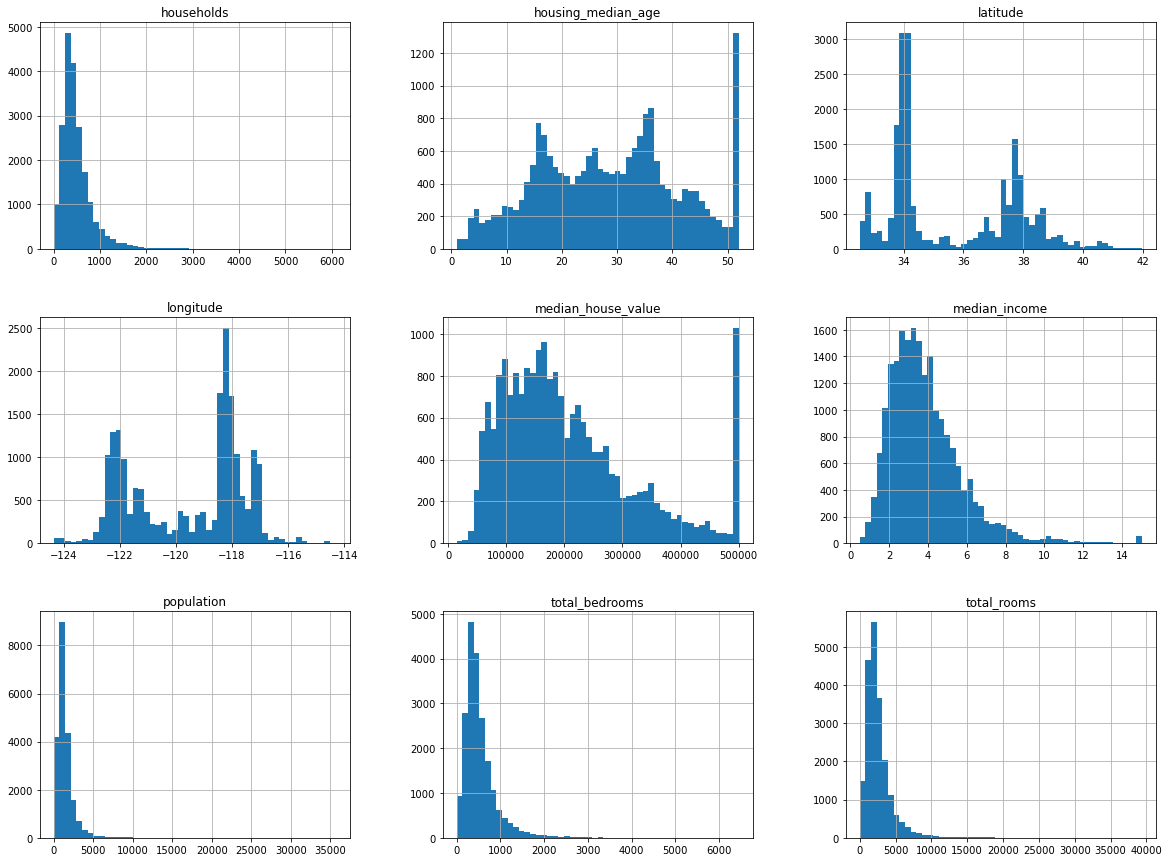

In [29]:
#descriptive stats etc.
# df.shape
# df.columns
# df.head()
# df.info()
# df.describe()
df.hist(bins=50, figsize=(20,15))

In [30]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [31]:
#Some useful data manipulations

import numpy as np

df["id"]=df["longitude"]*1000 + df["latitude"]

#change order of columns
newColumnsOrder = ['id','longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
df = df[newColumnsOrder]

#For stratified sampling, we need to create subgroups for our database. For that, we can create subgroup representations based on income.
df["income_cat"]=pd.cut(df["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [32]:
#non-stratified none-recommended sampling!
train = df.sample(frac = 0.8, random_state = 543253256)
test = df.drop(train.index)

print(train.shape)
print(test.shape)

(16512, 12)
(4128, 12)


In [33]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

spltiingIndexGenerator = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2432)
for trainIndex, testIndex in spltiingIndexGenerator.split(df, df["income_cat"]):
    train = df.loc[trainIndex]
    test = df.loc[testIndex]

print(train.shape)
print(test.shape)

(16512, 12)
(4128, 12)


In [34]:
# income_cat column was generated only for stratified sampling and we no longer need it
train = train.drop(columns = ['income_cat'])
test = test.drop(columns = ['income_cat'])
#Note that from now on we are using train dataset, and only at the every end for testing the ML model, we will be needing the test datset.

In [35]:
# train.to_csv("MyTrainDataSet.csv")

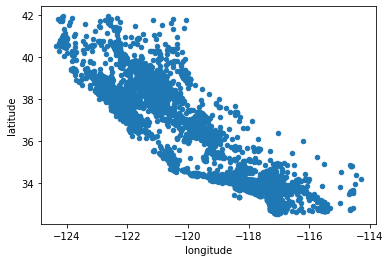

In [36]:
train.plot(kind="scatter", x="longitude", y='latitude')

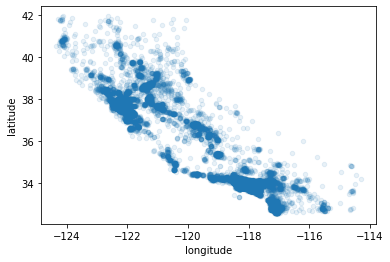

In [37]:
train.plot(kind="scatter", x="longitude", y='latitude', alpha=0.1)

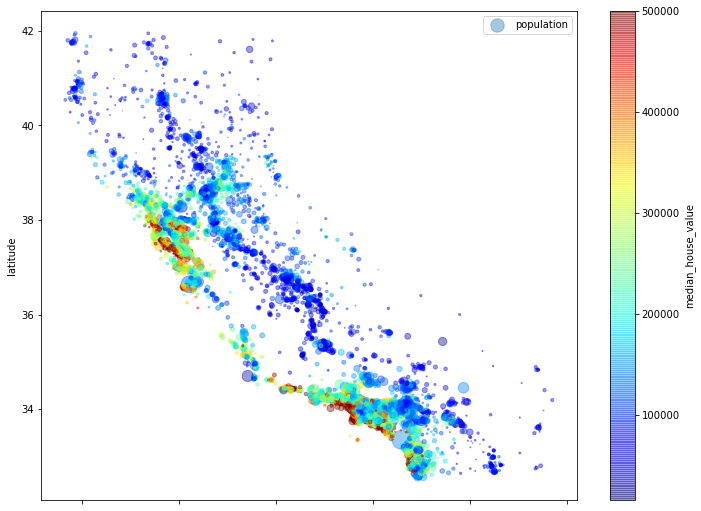

In [38]:
import matplotlib.pyplot as plt 

train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, label="population", figsize=(12,9),
           s=train['population']/100, c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253B62C3F70>,
      dtype=object)

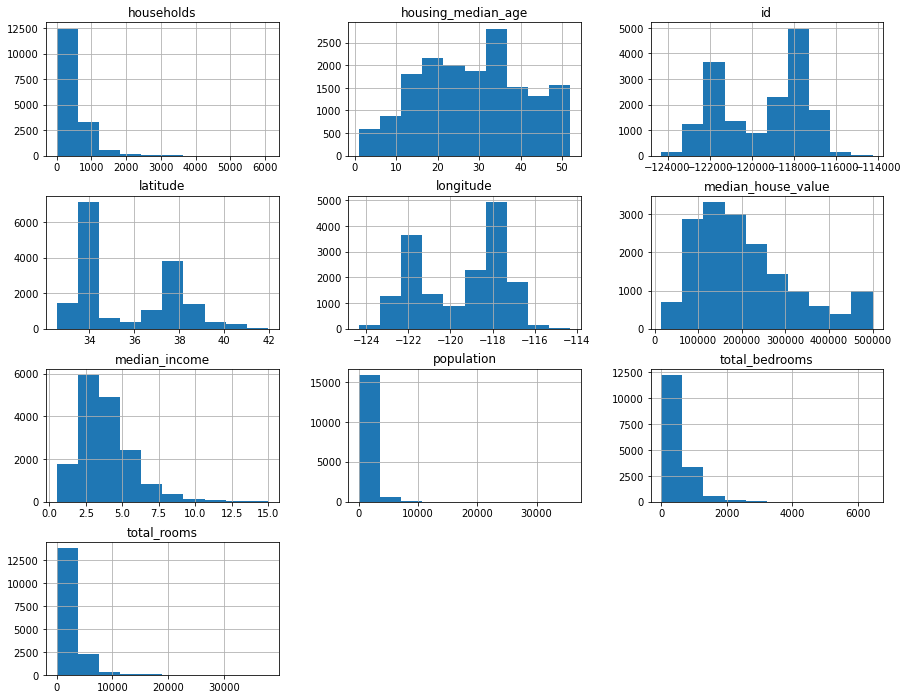

In [39]:
train.hist(figsize=(15,12))

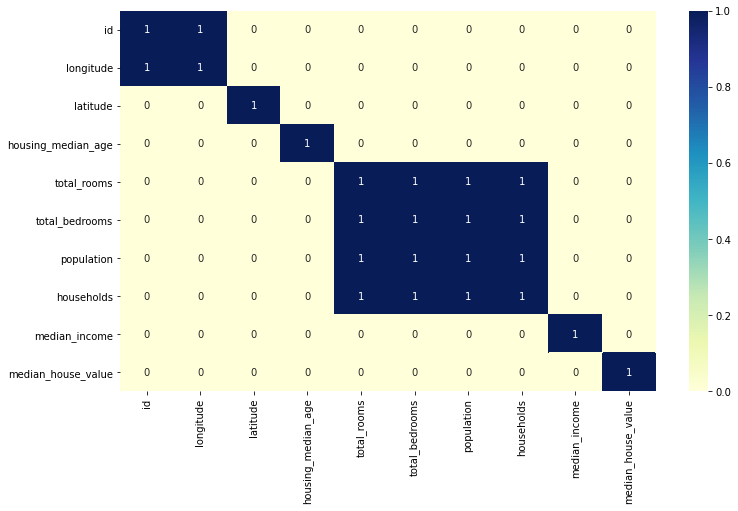

In [40]:
import seaborn as sb

corrMatrix = train.corr()
plt.figure(figsize = (12,7))
datapltot = sb.heatmap(abs(corrMatrix > 0.75), cmap='YlGnBu', annot = True)
plt.show()

In [41]:
corrMatrix['median_house_value'].sort_values()

latitude             -0.138033
id                   -0.053209
longitude            -0.053009
population           -0.022762
total_bedrooms        0.053883
households            0.069639
housing_median_age    0.103213
total_rooms           0.140187
median_income         0.689111
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [42]:
#To see if we have missing data in the data frame
np.where(pd.isnull(train))

(array([   50,    57,   244,   367,   395,   697,   728,   918,   961,
         1266,  1485,  1504,  1786,  2080,  2158,  2188,  2241,  2325,
         2655,  2747,  2959,  2962,  2977,  3106,  3113,  3489,  3599,
         3690,  3713,  3724,  3861,  4082,  4144,  4230,  4289,  4479,
         4556,  4653,  4668,  4692,  4714,  4743,  4844,  4849,  4860,
         5099,  5208,  5380,  5386,  5388,  5395,  5423,  5440,  5446,
         5609,  5796,  5873,  5936,  6033,  6292,  6342,  6587,  6591,
         6593,  6742,  6870,  6943,  6983,  7024,  7047,  7103,  7162,
         7190,  7290,  7362,  7403,  7626,  7779,  7786,  8147,  8207,
         8282,  8334,  8388,  8458,  8532,  8639,  8673,  9053,  9211,
         9314,  9361,  9616,  9631,  9784,  9902,  9955, 10027, 10328,
        10680, 10712, 10832, 10846, 10996, 11004, 11066, 11100, 11106,
        11122, 11148, 11187, 11376, 11483, 11512, 11540, 11548, 11690,
        11706, 11841, 12014, 12028, 12219, 12295, 12345, 12376, 12445,
      

In [43]:
train = train.dropna()
np.where(pd.isnull(train))

(array([], dtype=int64), array([], dtype=int64))

In [44]:
train = train.reset_index(drop = True)

In [45]:
from sklearn.preprocessing import OneHotEncoder
dataEncoder = OneHotEncoder()
oceanProximityDataEncoded = dataEncoder.fit_transform(train[['ocean_proximity']])
oceanProximityDataEncoded = oceanProximityDataEncoded.toarray() #the output was a sparse matrix. We change it to a dense matrix for easy manipulations.
catDataDF = pd.DataFrame(oceanProximityDataEncoded) #create a pandas dataframe from numpy array because we want the data to be in dataframe so that it can work well with the rest of train dataset

In [46]:
catDataDF

0    1    2    3    4
0      0.0  1.0  0.0  0.0  0.0
1      1.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  1.0
3      0.0  0.0  0.0  1.0  0.0
4      1.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...
16347  0.0  0.0  0.0  0.0  1.0
16348  1.0  0.0  0.0  0.0  0.0
16349  1.0  0.0  0.0  0.0  0.0
16350  0.0  0.0  0.0  0.0  1.0
16351  1.0  0.0  0.0  0.0  0.0

[16352 rows x 5 columns]

In [47]:
dataEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
y = train['median_house_value']

In [49]:
#Creating numerical data
numDataDF = train[['latitude','housing_median_age','total_rooms','median_income']]

#standardizing the numerical data
numDataDF = (numDataDF-numDataDF.mean())/numDataDF.std()

In [53]:
#Creating X data for .fit(X,y) - merging numerical and categorical data
X = numDataDF.join(catDataDF)

latitude  housing_median_age  total_rooms  median_income    0    1  \
0     -0.781848            0.269801    -0.470798      -0.586303  0.0  1.0   
1     -0.903505           -0.206513    -0.536921       1.119037  1.0  0.0   
2     -0.154848           -0.444670     0.216041      -0.539096  0.0  0.0   
3      0.968136            1.222428    -0.565791      -0.155547  0.0  0.0   
4     -0.753774            1.222428    -0.468935      -0.828653  1.0  0.0   
...         ...                 ...          ...            ...  ...  ...   
16347 -1.362057           -0.206513    -1.017941       0.066488  0.0  0.0   
16348 -0.828639           -0.047742    -0.110382      -0.126181  1.0  0.0   
16349 -0.753774            0.507957    -0.471729       0.056120  1.0  0.0   
16350 -0.870751            0.349186    -0.273826      -0.977852  0.0  0.0   
16351 -1.114064           -1.159141     0.217438      -0.057502  1.0  0.0   

         2    3    4  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  1.0  
3      0.0  1.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
16347  0.0  0.0  1.0  
16348  0.0  0.0  0.0  
16349  0.0  0.0  0.0  
16350  0.0  0.0  1.0  
16351  0.0  0.0  0.0  

[16352 rows x 9 columns]

In [56]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(X,y)  # this runs an optimization problem to create F in y = F(x1,x2,...,xn)
mdl.coef_

array([   1493.01634746,   14196.35803011,    7688.80207644,
         71239.17165666,  -28729.53261156, -101170.89325481,
        158028.99174637,  -18737.56259039,   -9391.00328961])

In [63]:
# evaluate how well the linear regressor learned the train data

from sklearn.metrics import mean_squared_error 
predictions = mdl.predict(X) 
mse = mean_squared_error(y, predictions)
np.sqrt(mse)

72436.57833795324